In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Exploratory Data Analysis

Our dataset contains only categorical variables with the exception of 'average rating' feature.  Even this feature is cannot be considered a continous variable because this is a number label signifying the rating for a movie from 0 to 10 upto 1 decimal value.  

Because of this limitation, we are not able to do a in depth EDA on this dataset. However, we will attempt to get some basic but meaningful statistics off of the dataset as much as we can.

In [3]:
#import dataset
df = pd.read_csv('data/new_pop.csv')

In [4]:
df

,Unnamed: 0,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,popularity,flag,new_genres
0,0,tt0000009,Miss Jerry,0,1894.0,45.0,romance,nm0085156,nm0085156,5.5,80,5.804198e-07,1,romance
1,1,tt0000147,The Corbett-Fitzsimmons Fight,0,1897.0,20.0,"documentary,news,sport",nm0714557,NaN,5.2,301,2.064711e-06,1,documentary
2,2,tt0000335,Soldiers of the Cross,0,1900.0,89.0,"biography,drama","nm0095714,nm0675140",NaN,6.3,39,3.241117e-07,1,drama
3,3,tt0000574,The Story of the Kelly Gang,0,1906.0,70.0,"biography,crime,drama",nm0846879,nm0846879,6.2,514,4.203822e-06,1,drama
4,4,tt0000615,Robbery Under Arms,0,1907.0,89.0,drama,nm0533958,"nm0092809,nm0533958",4.8,15,9.497778e-08,1,drama
5,5,tt0000630,Hamlet,0,1908.0,89.0,drama,nm0143333,nm0000636,2.9,11,4.208043e-08,1,drama
6,6,tt0000675,Don Quijote,0,1908.0,89.0,drama,nm0194088,nm0148859,4.3,10,5.672284e-08,1,drama
7,7,tt0000676,Don Álvaro o la fuerza del sino,0,1908.0,89.0,drama,nm0194088,nm0729044,3.8,9,4.511445e-08,1,drama
8,8,tt0000679,The Fairylogue and Radio-Plays,0,1908.0,120.0,"adventure,fantasy","nm0091767,nm0877783","nm0000875,nm0877783",4.8,33,2.089511e-07,0,NaN
9,9,tt0000739,El pastorcito de Torrente,0,1908.0,89.0,drama,nm0191133,NaN,6.1,9,7.242056e-08,1,drama


The main dataset we are working with consists of 222860 records of movies.  These include movies registered in imdb database that are from all over the world not only from Hollywood.

#### Start Year

startYear column in the dataframe contains year data of when the movie was released.

In [5]:
year = df.startYear
print('Earliest year in dataset: ',year.min())
print('Latest year in dataset: ',year.max())

Earliest year in dataset:  1894.0
Latest year in dataset:  2019.0


In [6]:
unique_year = sorted(year.unique())

missing_year = [x for x in range(1894,2020) if x not in unique_year]

print('From 1894 to 2019, the only years without any movies recorded in imdb are ',missing_year)

From 1894 to 2019, the only years without any movies recorded in imdb are  [1895, 1896, 1899, 1901, 1902, 1904]


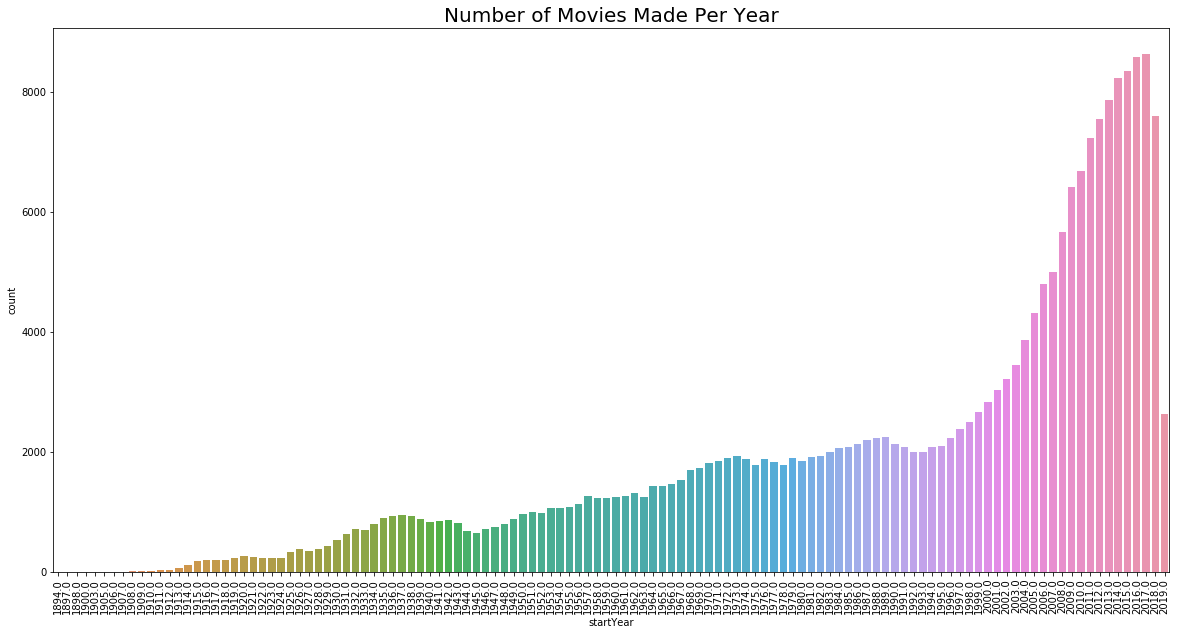

In [9]:
plt.figure(figsize=[20,10])
sns.countplot(data=df, x='startYear')
plt.title('Number of Movies Made Per Year',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

We can see from the plot above that the number of movies getting released all over the world has been steadily rising.  And at around year 2000, there has been a huge boom in that number as smaller production companies were created as well as new platforms were introduced.  

Year 2018 and 2019 seem to have dropped but this is only because data was collected in early 2019 where not all entries have been made for the year and the prior year.

#### Runtime

runtimeMinutes column in dataframe represents the runtime of the movie.

In [42]:
runtime = df.runtimeMinutes
print('Shortest film in dataset: ',runtime.min())
print('Longest film in dataset: ',runtime.max())

Shortest film in dataset:  1.0
Longest film in dataset:  51420.0


In [43]:
oneMinute = runtime==1.0
oneMinute.sum()

2

Interestingly there are two 1 minute long movies in the dataset and some movies going up to a few hundred hours long.  Number of these movies were very small and were ignored.

In [44]:
df.runtimeMinutes.describe()

count    222860.000000
mean         93.694382
std         117.667341
min           1.000000
25%          83.000000
50%          90.000000
75%         100.000000
max       51420.000000
Name: runtimeMinutes, dtype: float64

Overall, the mean does sit around an hour and half which is usually what we have been expecting for how long an average movie should be.  But this is including all outliers and also doesn't show us how the data is changing over time.

Let's remove the outliers, then slice the dataset into two decades.
For outlier removal, we will use the IQR method.

In [45]:
#We already know the 25th and 75th percentile of the dataset from our describe() above
iqr = 100-83
lower= 83-(1.5*iqr)
upper= 100+(1.5*iqr)
lower,upper

(57.5, 125.5)

Upper bound looks like its a bit tight as there are quite a few movies spanning over two hours in recent years.  This may be because we are calculating movies from 1890's and on but we do have heavier number of movies, meaning more weight, as the year approaches late 2010's.

In [49]:
within_iqr = []

#outlier locating
for x in runtime:
    if x <= upper and x>= lower:
        within_iqr.append(True)
    else:
        within_iqr.append(False)
        
#outlier removing
df_within = df[within_iqr]

In [81]:
df_within.runtimeMinutes.describe()

count    198995.000000
mean         90.760647
std          13.315671
min          58.000000
25%          84.000000
50%          90.000000
75%          98.000000
max         125.000000
Name: runtimeMinutes, dtype: float64

In [59]:
until_1910 = df_within[df_within.startYear < 1910]

#Looks like movies before 1900 were too short to be included.  There were only two movies to consider.
until_1910.startYear.min()

1900.0

In [68]:
year = df_within.startYear
until_1930 = df_within[year.between(1910,1929)]

until_1950 = df_within[year.between(1930,1949)]

until_1970 = df_within[year.between(1950,1969)]

until_1990 = df_within[year.between(1970,1989)]

until_2010 = df_within[year.between(1990,2009)]

until_2020 = df_within[year.between(2010,2019)]

In [82]:
until_1910.runtimeMinutes.describe()

count     28.000000
mean      89.428571
std        6.983730
min       70.000000
25%       89.000000
50%       89.000000
75%       89.000000
max      120.000000
Name: runtimeMinutes, dtype: float64

In [75]:
until_1930.runtimeMinutes.describe()

count    3521.000000
mean       81.374609
std        13.873320
min        58.000000
25%        70.000000
50%        87.000000
75%        89.000000
max       125.000000
Name: runtimeMinutes, dtype: float64

In [76]:
until_1950.runtimeMinutes.describe()

count    14325.000000
mean        81.797766
std         15.052243
min         58.000000
25%         69.000000
50%         82.000000
75%         92.000000
max        125.000000
Name: runtimeMinutes, dtype: float64

In [77]:
until_1970.runtimeMinutes.describe()

count    23500.000000
mean        90.647447
std         12.452502
min         58.000000
25%         84.000000
50%         90.000000
75%         98.000000
max        125.000000
Name: runtimeMinutes, dtype: float64

In [78]:
until_1990.runtimeMinutes.describe()

count    35482.000000
mean        91.583451
std         12.013292
min         58.000000
25%         85.000000
50%         90.000000
75%         98.000000
max        125.000000
Name: runtimeMinutes, dtype: float64

In [79]:
until_2010.runtimeMinutes.describe()

count    57194.000000
mean        92.624104
std         12.609467
min         58.000000
25%         87.000000
50%         90.000000
75%        100.000000
max        125.000000
Name: runtimeMinutes, dtype: float64

In [80]:
until_2020.runtimeMinutes.describe()

count    64945.000000
mean        91.197413
std         13.481970
min         58.000000
25%         84.000000
50%         90.000000
75%         99.000000
max        125.000000
Name: runtimeMinutes, dtype: float64

As suspected before, we can see that the mean runtime is risen as compared to early 1900's by almost 10 minutes.  This is 12.3% increase which is very significant given that outliers from lower and upper end were removed already.

#### Genres

Genres column has already been dissected multiple times during the course of this project.

There are 28 different unique genres and each movie can contain up to 3 genres listed in alphabetical order.

So there may be upto 3276 different combinations of these genres.


In [91]:
# list of genre types will be useful here.
genre_type = ['Romance', 'Documentary', 'News', 'Sport', 'Biography', 'Drama', 'Crime', 'Adventure', 'Fantasy', 'Comedy', 'War', 'Family', 'History', 'SciFi', 'Western', 'Thriller', 'Mystery', 'Horror', 'Action', 'Music', 'Short', 'Animation', 'Musical', 'FilmNoir', 'TalkShow', 'Adult', 'RealityTV', 'GameShow']
print('Unique genre types: ', len(genre_type))

Unique genre types:  28


In [90]:
print('But our dataset contains only ',df.genres.unique().size,' combinations.')

But our dataset contains only  1230  combinations.


We used countplots in previous section to find out the top 5 genres most commonly used. 
Refer to DataStorytelling0's 'Top Genres' section for details.

Later we used these top 5 genres to feature engineer the full dataset to get the datafram we are currently working with.

As a result, we have a 'flag' column in the dataframe that tells us whether any of the top 5 genres was used for a movie as well as 'new_genres' column that shows which of the top 5 genres were used.

In [92]:
top5genres = ['romance','drama','documentary','thriller','action']

Decision to only use movies that included any of the top 5 genres was made because of the following reasons:

1, There were too many different combinations of genres that limited categorizing the records for analysis

2, Movies that did not contain any of the top 5 genres were miniscule in number

3, Movies that did not contain any of the top 5 genres mostly had low scores that did not prove useful

#### Directors

Directors column contains the identifier that can be used with df_name to get the actual name of the director.

In [93]:
print('Number of directors in the movie: ', len(df.directors.unique()))

Number of directors in the movie:  94577


One of the points of this project is to find characteristics in movies that would make it popular.  Although there can be exceptions, directors who have only directed or produced one movie are not likely to be considered as popular movie directors.

In [95]:
df_experienced = df.groupby('directors').filter(lambda x : len(x)>1)

In [100]:
print('Excluding the one-time directors, we are left with ',len(df_experienced.directors.unique()),' directors.')

Excluding the one-time directors, we are left with  30857  directors.


Directors with popular movies and the number of movies they made have already been visited in both DataStorytelling0 and 1.

#### Average Rating / Number of Votes

averageRating column contains a number between 1 to 10 representing the viewer rating score up to 1 decimal value.

numVotes column contains number of viewers who rated the movie.

In [102]:
df.averageRating.describe()

count    222860.000000
mean          6.208101
std           1.322208
min           1.000000
25%           5.400000
50%           6.400000
75%           7.100000
max          10.000000
Name: averageRating, dtype: float64

In [103]:
df.numVotes.describe()

count    2.228600e+05
mean     3.401562e+03
std      3.115354e+04
min      5.000000e+00
25%      1.500000e+01
50%      5.200000e+01
75%      2.800000e+02
max      2.111597e+06
Name: numVotes, dtype: float64

The two columns by itself did not prove to be much useful.  The ratings for each movies varied day and night depending on the number of people voted for it. And with standard deviation of 3.4E04 for numVotes column, it was apparent that there were way too much variation in the data.  

#### Popularity Metric

Our goal for this project was not neccessarily to find the highest rated movie but to find the most popular movies.
Popularity was determined heavily by combining both number of votes the movie has gotten and the average ratings.

The outcome is the 'popularity' column in the dataset. We follow the below simple calculation to get the metric.

#### popularity metric = averageRating * numVotes/totalVotes

Refer to DataStorytelling0 for more details.

This metric gave us key insight as to which movies to consider and which to ignore.  even if a movie had averageRating of 9.5, if only 5 people voted for that movie, it scored very low as this reflects that the movie, although well made, was not a box office hit.